In [ ]:
# CELL 1: Install & import semua library
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

print('✅ Library siap')

✅ Library siap


In [ ]:
# CELL 2: Load dataset dengan nama persis
df = pd.read_csv('Campus Recruitment.csv', encoding='utf-8-sig')

print('✅ Dataset dimuat')
print('Ukuran:', df.shape)
df.head()

✅ Dataset dimuat
Ukuran: (215, 15)


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [ ]:
# CELL 3: Cetak semua nama kolom ASLI
print("=== NAMA KOLOM ASLI ===")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. '{col}'")

=== NAMA KOLOM ASLI ===
 1. 'ID'
 2. 'Jenis Kelamin'
 3. 'Nilai rata-rata SMP'
 4. 'Lembaga pendidikan kelas 10'
 5. 'Nilai rata-rata SMA'
 6. 'Lembaga pendidikan kelas 12'
 7. 'Jurusan saat SMA'
 8. 'IPK'
 9. 'Program studi sarjana'
10. 'Pengalaman kerja sebelum lulus'
11. 'Nilai tes kemampuan kerja'
12. 'Pendidikan pascasarjana'
13. 'Nilai rata-rata pascasarjana'
14. 'status kelulusan (Bekerja/Belum)'
15. 'Gaji'


In [ ]:
# CELL 4: Seragamkan nilai gender (M/F)
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({
    'Male': 'M',
    'Female': 'F',
    ' M': 'M',
    ' F': 'F',
    'male': 'M',
    'female': 'F'
}).str.upper().str.strip()

print('✅ Jenis Kelamin setelah dibersihkan:')
print(df['Jenis Kelamin'].value_counts())

✅ Jenis Kelamin setelah dibersihkan:
Jenis Kelamin
M    139
F     75
Name: count, dtype: int64


In [ ]:
# CELL 5: Imputasi missing values
from sklearn.impute import SimpleImputer

# Daftar kolom numerik (dengan nama ASLI)
num_cols = [
    'Nilai rata-rata SMP',
    'Nilai rata-rata SMA',
    'IPK',
    'Nilai tes kemampuan kerja',
    'Nilai rata-rata pascasarjana'
]

# Imputer median untuk numerik
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Daftar kolom kategorikal
cat_cols = [
    'Jenis Kelamin',
    'Lembaga pendidikan kelas 10',
    'Lembaga pendidikan kelas 12',
    'Jurusan saat SMA',
    'Program studi sarjana',
    'Pengalaman kerja sebelum lulus',
    'Pendidikan pascasarjana'
]

# Imputer modus untuk kategorikal
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

print('✅ Missing values sudah diatasi')
print(df.isnull().sum())

✅ Missing values sudah diatasi
ID                                   0
Jenis Kelamin                        0
Nilai rata-rata SMP                  0
Lembaga pendidikan kelas 10          0
Nilai rata-rata SMA                  0
Lembaga pendidikan kelas 12          0
Jurusan saat SMA                     0
IPK                                  0
Program studi sarjana                0
Pengalaman kerja sebelum lulus       0
Nilai tes kemampuan kerja            0
Pendidikan pascasarjana              0
Nilai rata-rata pascasarjana         0
status kelulusan (Bekerja/Belum)     0
Gaji                                67
dtype: int64


In [ ]:
# CELL 6: Buat target 'placed' dari kolom ASLI
target_col = 'status kelulusan (Bekerja/Belum)'
df['target'] = df[target_col].map({'Placed': 1, 'Not Placed': 0})

print('✅ Target dibuat:')
print(df['target'].value_counts())

✅ Target dibuat:
target
1    148
0     67
Name: count, dtype: int64


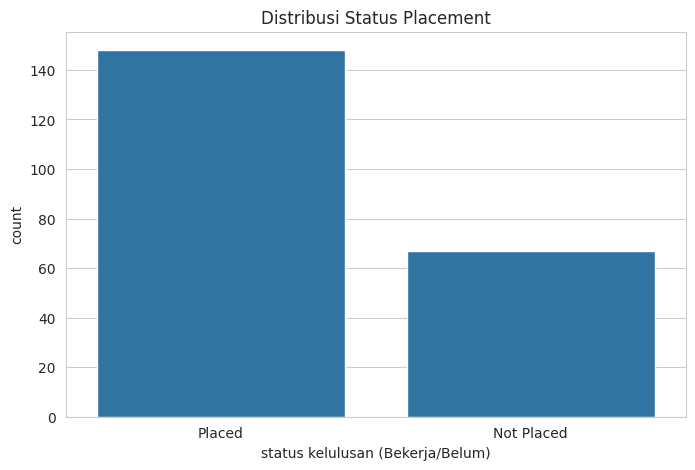

status kelulusan (Bekerja/Belum)
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64


In [ ]:
# CELL 7: EDA - visualisasi distribusi target
plt.figure(figsize=(8,5))
sns.countplot(x=target_col, data=df)
plt.title('Distribusi Status Placement')
plt.show()

# Cek proporsi
print(df[target_col].value_counts(normalize=True))

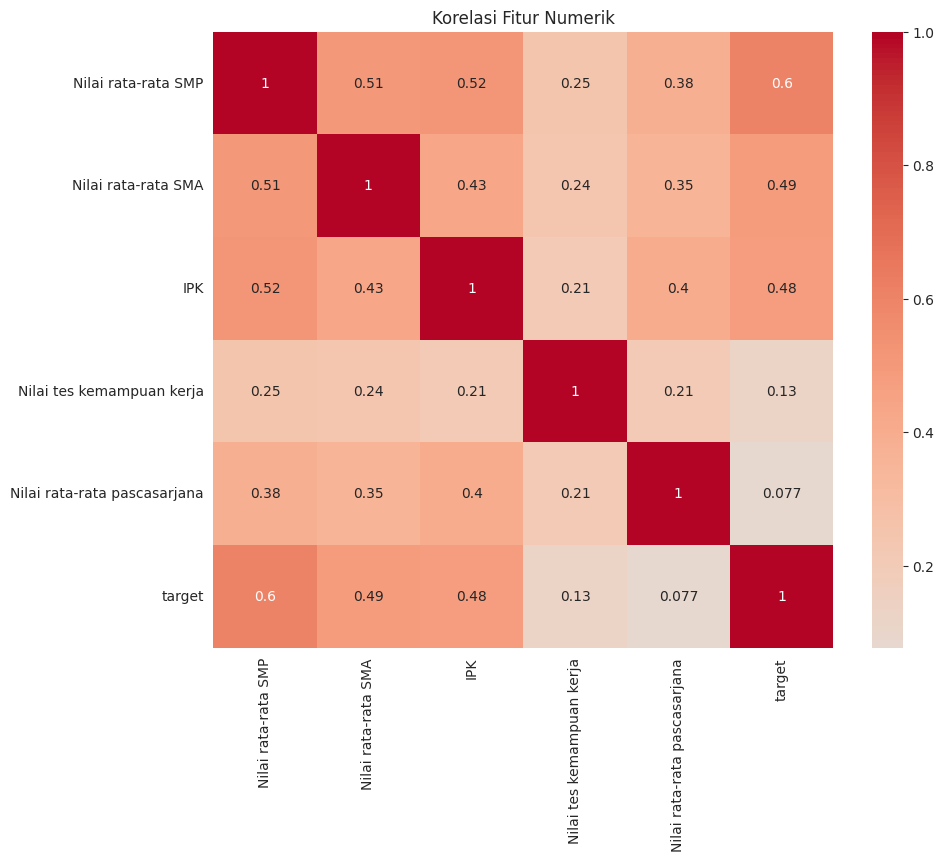

In [ ]:
# CELL 7b: Korelasi fitur numerik dengan target
num_df = df[num_cols + ['target']].copy()
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Fitur Numerik')
plt.show()

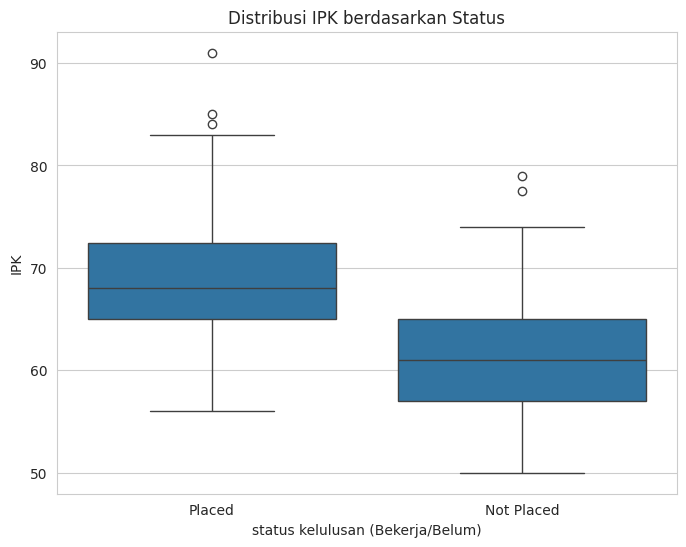

In [ ]:
# CELL 7c: Boxplot IPK vs Status
plt.figure(figsize=(8,6))
sns.boxplot(x=target_col, y='IPK', data=df)
plt.title('Distribusi IPK berdasarkan Status')
plt.show()

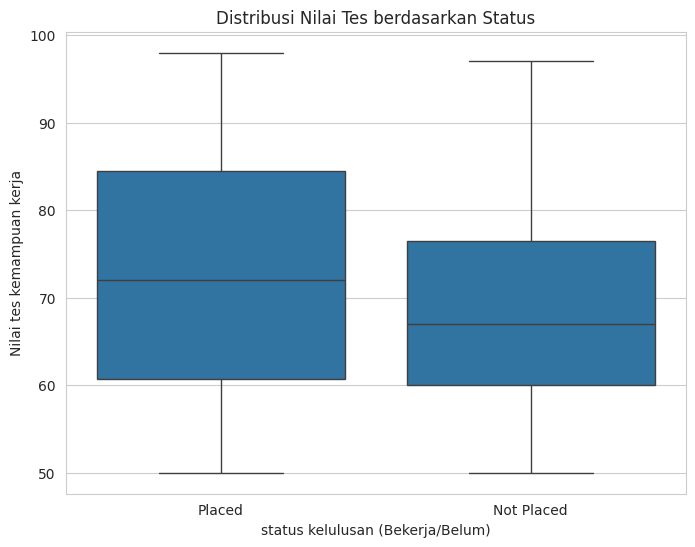

In [ ]:
# CELL 7d: Boxplot Nilai Tes vs Status
plt.figure(figsize=(8,6))
sns.boxplot(x=target_col, y='Nilai tes kemampuan kerja', data=df)
plt.title('Distribusi Nilai Tes berdasarkan Status')
plt.show()

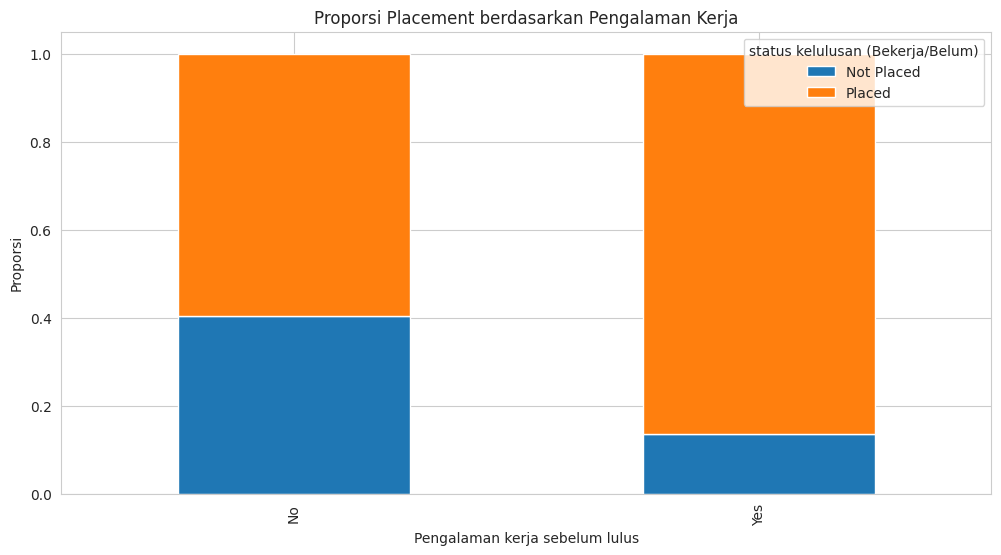

In [ ]:
# CELL 7e: Proporsi placement berdasarkan Pengalaman Kerja
pd.crosstab(df['Pengalaman kerja sebelum lulus'], df[target_col], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proporsi Placement berdasarkan Pengalaman Kerja')
plt.ylabel('Proporsi')
plt.show()

In [ ]:
# CELL 8: Label Encoding semua kolom kategorikal
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le   # simpan untuk keperluan interpretasi (opsional)

print('✅ Encoding selesai')

✅ Encoding selesai


In [ ]:
# CELL 9: Persiapan data untuk modeling

# Fitur: semua kolom kecuali ID, Gaji, target asli, dan target biner
X = df.drop(columns=['ID', 'Gaji', target_col, 'target'])
y = df['target']

# Scaling fitur numerik
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Train size: {X_train.shape}, Test size: {X_test.shape}')

Train size: (172, 12), Test size: (43, 12)


In [ ]:
# CELL 10: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print('=== LOGISTIC REGRESSION ===')
print(classification_report(y_test, y_pred_lr))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_lr))

=== LOGISTIC REGRESSION ===
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43

ROC-AUC: 0.9538461538461539


=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43

ROC-AUC: 0.9615384615384616

TOP 5 FITUR PENTING:
Nilai rata-rata SMP             0.304477
IPK                             0.184986
Nilai rata-rata SMA             0.144827
Nilai rata-rata pascasarjana    0.117499
Nilai tes kemampuan kerja       0.059397
dtype: float64


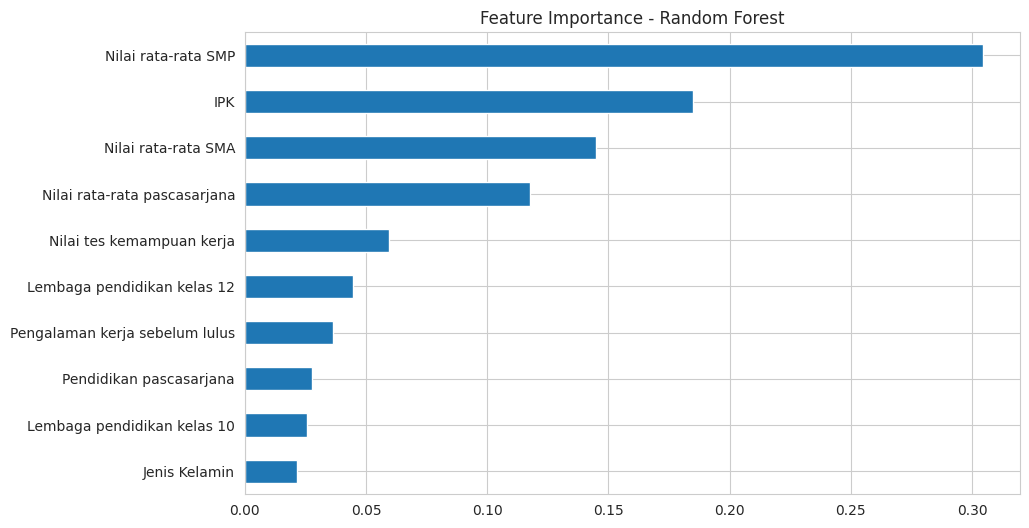

In [ ]:
# CELL 11: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print('=== RANDOM FOREST ===')
print(classification_report(y_test, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_rf))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nTOP 5 FITUR PENTING:')
print(importances.head(5))

# Plot feature importance
plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# CELL 12: XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print('=== XGBOOST ===')
print(classification_report(y_test, y_pred_xgb))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_xgb))

=== XGBOOST ===
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43

ROC-AUC: 0.9435897435897436


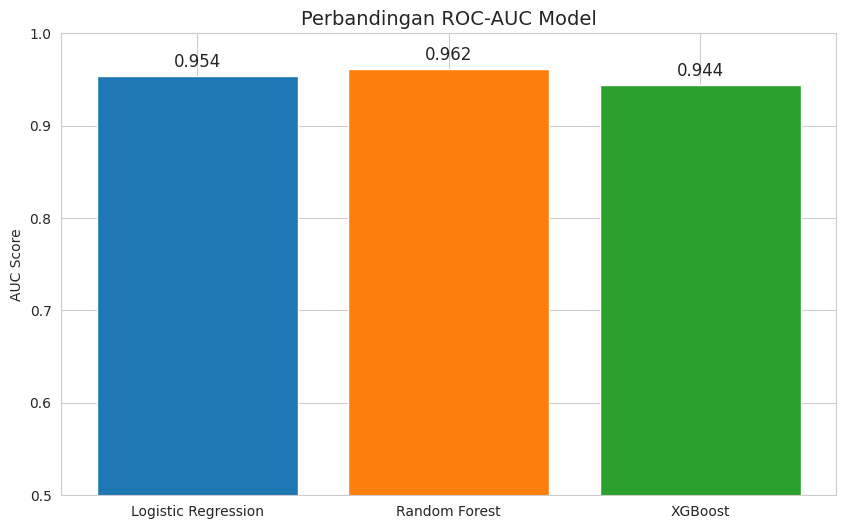


=== RINGKASAN PERFORMANCE ===
                 Model   ROC-AUC
1        Random Forest  0.961538
0  Logistic Regression  0.953846
2              XGBoost  0.943590


In [ ]:
# CELL 13: Bandingkan ROC-AUC semua model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
auc_scores = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_xgb)
]

plt.figure(figsize=(10,6))
bars = plt.bar(models, auc_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Perbandingan ROC-AUC Model', fontsize=14)
plt.ylabel('AUC Score')
plt.ylim(0.5, 1.0)

for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', fontsize=12)

plt.show()

# Buat dataframe ringkasan
summary = pd.DataFrame({
    'Model': models,
    'ROC-AUC': auc_scores
}).sort_values('ROC-AUC', ascending=False)
print('\n=== RINGKASAN PERFORMANCE ===')
print(summary)

In [ ]:
# CELL 14: Cetak insight untuk laporan
print("=== INSIGHT BISNIS ===")
print("1. Faktor paling berpengaruh terhadap placement:")
print(importances.head(5).to_string())
print("\n2. Model terbaik:", summary.iloc[0]['Model'], "dengan AUC =", round(summary.iloc[0]['ROC-AUC'],3))
print("\n3. Rekomendasi strategi:")
print("   - Tingkatkan kemampuan tes employability (nilai tes kerja)")
print("   - Dorong mahasiswa untuk memiliki pengalaman kerja sebelum lulus")
print("   - IPK tetap menjadi filter penting dalam rekrutmen")
print("   - Pertimbangkan latar belakang SMA/SMP dan jurusan")
print("   - Kampus perlu menyediakan pelatihan softskill dan sertifikasi")

=== INSIGHT BISNIS ===
1. Faktor paling berpengaruh terhadap placement:
Nilai rata-rata SMP             0.304477
IPK                             0.184986
Nilai rata-rata SMA             0.144827
Nilai rata-rata pascasarjana    0.117499
Nilai tes kemampuan kerja       0.059397

2. Model terbaik: Random Forest dengan AUC = 0.962

3. Rekomendasi strategi:
   - Tingkatkan kemampuan tes employability (nilai tes kerja)
   - Dorong mahasiswa untuk memiliki pengalaman kerja sebelum lulus
   - IPK tetap menjadi filter penting dalam rekrutmen
   - Pertimbangkan latar belakang SMA/SMP dan jurusan
   - Kampus perlu menyediakan pelatihan softskill dan sertifikasi
